In [14]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import prince

In [2]:
df_data = pd.read_csv("../results/pivote_data_with_clusters_compounds.csv")
df_data.head(5)

,standardized_smiles,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,number_of_profiles,Kmeans,AgglomerativeClustering,Birch,BisectingKMeans,SpectralClustering,DBSCAN
0,BrC=Cc1ccccc1,0,1,1,1,0,0,0,0,3,0,7,0,1,0,-1
1,C#CC(C)(O)CCC=C(C)C,0,1,1,1,1,0,1,0,5,4,2,0,2,0,-1
2,C#CC1(OC(C)=O)CCCCC1,0,1,1,1,1,0,1,0,5,2,2,0,4,0,-1
3,C#CC1(OC(C)=O)CCCCC1C(C)CC,0,1,1,0,1,0,1,0,4,4,2,0,2,0,-1
4,C#CCO,0,0,1,0,0,0,0,0,1,7,6,2,0,0,-1


In [5]:
label_columns = [col for col in df_data.columns if col.startswith("label_")]

cluster_col = "AgglomerativeClustering"

df_long = df_data.melt(
    id_vars=["standardized_smiles", cluster_col], 
    value_vars=label_columns, 
    var_name="odor_cluster", 
    value_name="present"
)

df_long = df_long[df_long["present"] == 1]

odor_distribution = df_long.groupby([cluster_col, "odor_cluster"]).size().unstack(fill_value=0)
odor_distribution_prop = odor_distribution.div(odor_distribution.sum(axis=1), axis=0)

odor_distribution_prop.round(3)


odor_cluster,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7
AgglomerativeClustering,,,,,,,,
0,0.159,0.108,0.179,0.195,0.112,0.056,0.161,0.030
1,0.119,0.123,0.207,0.192,0.143,0.033,0.169,0.013
2,0.119,0.138,0.201,0.207,0.097,0.059,0.150,0.030
3,0.147,0.116,0.219,0.225,0.098,0.033,0.139,0.021
4,0.155,0.157,0.189,0.206,0.068,0.068,0.135,0.022
5,0.179,0.139,0.184,0.216,0.057,0.061,0.123,0.040
6,0.148,0.100,0.131,0.181,0.046,0.130,0.170,0.093
7,0.157,0.132,0.176,0.194,0.082,0.073,0.143,0.042


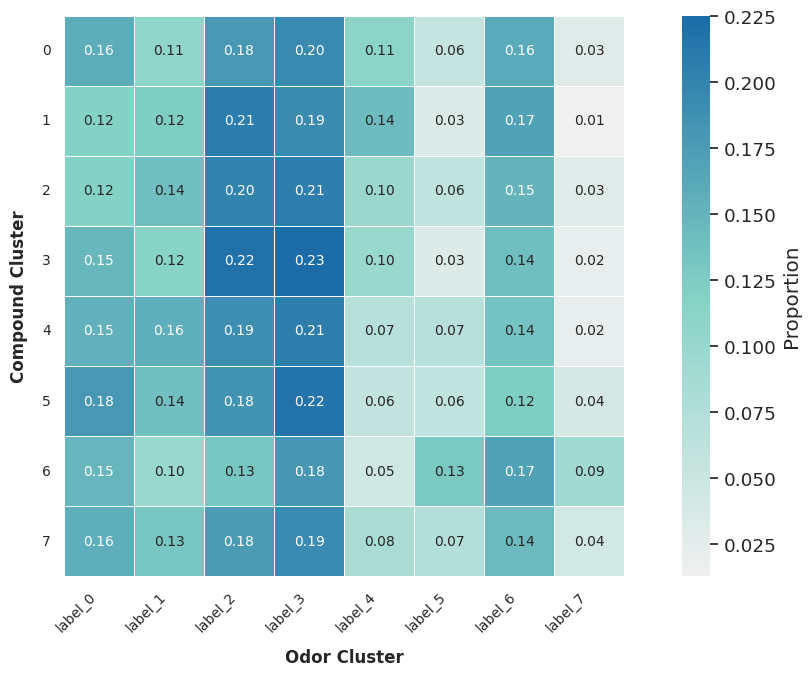

In [10]:
sns.set(style="whitegrid", font_scale=1.2)

custom_colors = ["#f0f0f0", "#84d2c5", "#1b6ca8"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)
                                                
plt.figure(figsize=(12, 7))
ax = sns.heatmap(
    odor_distribution_prop,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Proportion'},
    square=True,
    annot_kws={"size": 10}
)

ax.set_xlabel("Odor Cluster", fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel("Compound Cluster", fontsize=12, weight='bold', labelpad=10)

ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()

In [11]:
df_tsne = pd.read_csv("../results/tsne_compounds.csv")
df_tsne.head(5)

,t-SNE 1,t-SNE 2,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,Kmeans,AgglomerativeClustering,Birch,BisectingKMeans,AffinityPropagation,HDBSCAN,SpectralClustering,DBSCAN
0,37.105120,18.953972,0,1,1,1,0,0,0,0,0,7,0,1,226,-1,0,-1
1,2.968546,-20.378899,0,1,1,1,1,0,1,0,4,2,0,2,69,-1,0,-1
2,-8.873305,-1.120251,0,1,1,1,1,0,1,0,2,2,0,4,11,-1,0,-1
3,10.804349,-21.730011,0,1,1,0,1,0,1,0,4,2,0,2,69,-1,0,-1
4,-24.120010,-59.995274,0,0,1,0,0,0,0,0,7,6,2,0,155,-1,0,-1


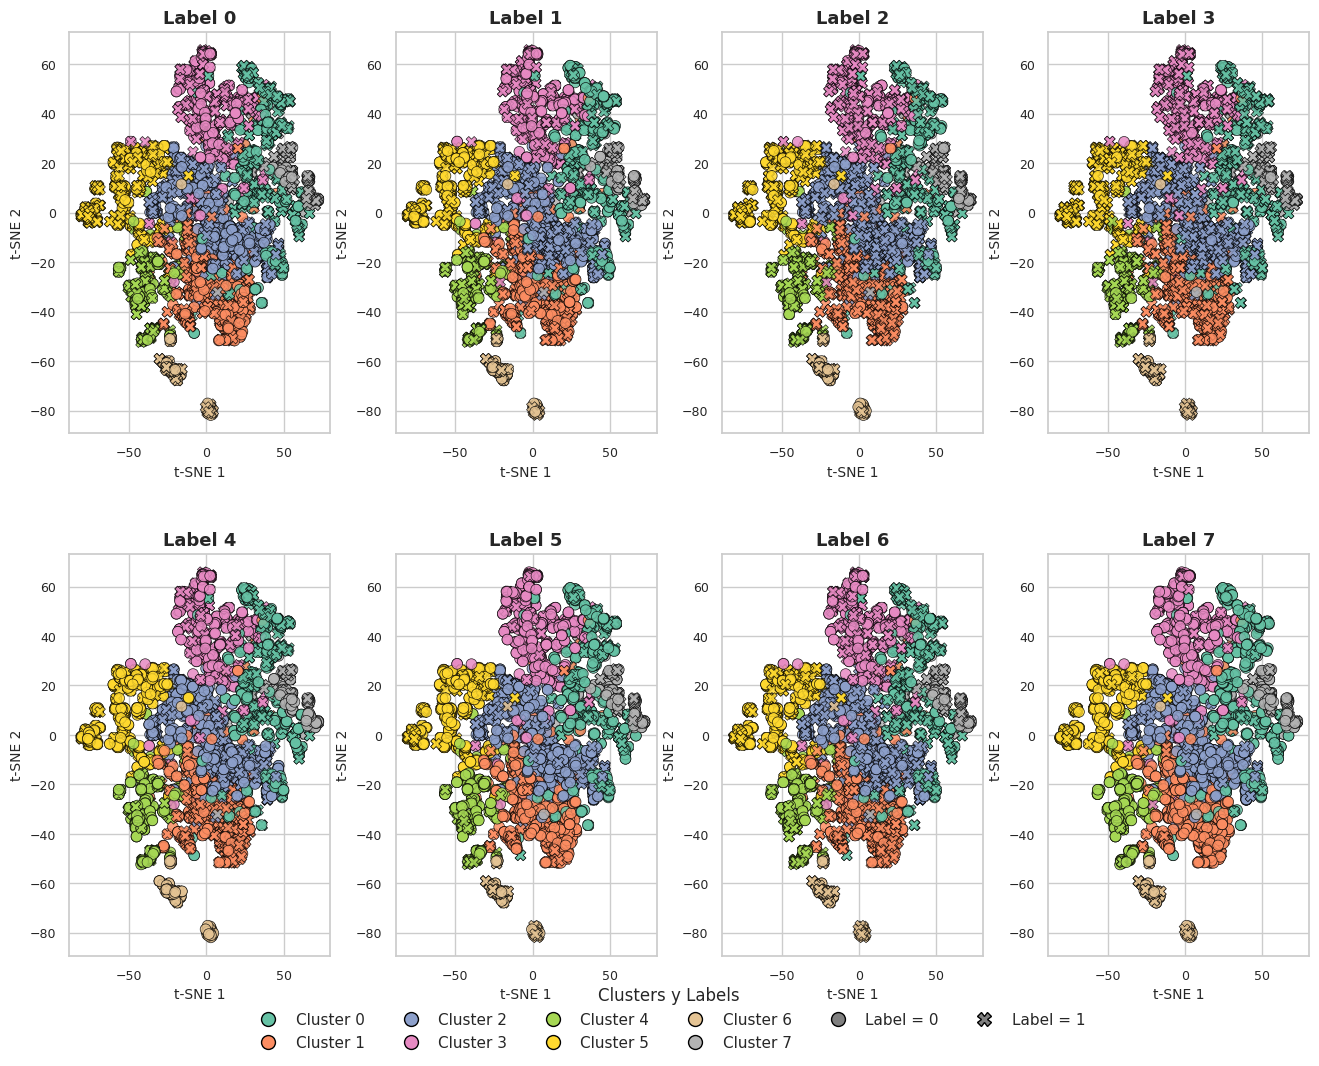

In [23]:
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("Set2")
cluster_colors = palette.as_hex()

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 4, figure=fig, wspace=0.25, hspace=0.3)

handles, labels = [], []
index = 0
for i in range(2):
    for j in range(4):
        ax = fig.add_subplot(gs[i, j])
        scatter = sns.scatterplot(
            data=df_tsne,
            x="t-SNE 1",
            y="t-SNE 2",
            hue="AgglomerativeClustering",
            style=f"label_{index}",
            palette=cluster_colors,
            edgecolor="black",
            linewidth=0.5,
            s=60,
            alpha=0.85,
            ax=ax
        )

        ax.set_title(f"Label {index}", fontsize=13, weight='bold')
        ax.set_xlabel("t-SNE 1", fontsize=10)
        ax.set_ylabel("t-SNE 2", fontsize=10)
        ax.tick_params(labelsize=9)
        ax.get_legend().remove()
        index += 1

color_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
           markerfacecolor=cluster_colors[i], markersize=10, markeredgecolor='black')
    for i in range(len(cluster_colors))
]

style_legend = [
    Line2D([0], [0], marker='o', color='gray', label='Label = 0', markersize=10, linestyle='', markeredgecolor='black'),
    Line2D([0], [0], marker='X', color='gray', label='Label = 1', markersize=10, linestyle='', markeredgecolor='black'),
]

custom_legend = color_legend + style_legend

fig.legend(
    handles=custom_legend,
    loc='lower center',
    ncol=6,
    fontsize=11,
    title="Clusters y Labels",
    title_fontsize=12,
    frameon=False,
    bbox_to_anchor=(0.5, 0.02)
)

plt.tight_layout(rect=[0, 0.08, 1, 0.96]) 
plt.show()